In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
totDF = pd.read_csv('../data/raw/Cleaned_data_set.csv')

### Functions:

#### Create a new feature that for mothers first child

In [ ]:
totDF['is_first_child'] = (totDF['prior_living_births']+totDF['prior_dead_births']+totDF['prior_terminations']) <= 0

%time first_child = totDF.mask(totDF['is_first_child'] == False)

In [ ]:
%time first_child = totDF.mask(totDF['is_first_child'] == False)

### Time Series Graphs

#### First child by age group

In [ ]:
plot_gpYR(first_child,'mothers_age_groups','Year giving birth',
          "Mother's Age Group",'Number of First Time Mothers, in Each Age Group ')
plt.savefig('./Saved_Visualizations/mother_1stchild_ts.pdf')
plt.savefig('./Saved_Visualizations/mother_1stchild_ts.png')

In [ ]:
plot_gpYR(totDF,'mothers_bmirecode','Year giving birth',
        'Mothers BMI','Mothers BMI over time')

#### Plurality over time

<Figure size 1440x1440 with 0 Axes>

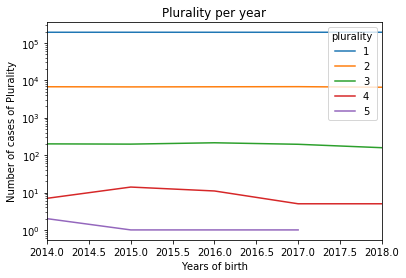

In [12]:
plot_gpYR(totDF,'plurality','Years of birth',
          'Number of cases of Plurality', 'Plurality per year')

plt.savefig('./Saved_Visualizations/plurality_ts.pdf')
plt.savefig('./Saved_Visualizations/plurality_ts.png')

#### Age groups

#### BMI recoded - needs some work

In [ ]:
plot_gpYR(totDF,'mothers_age_groups','Year giving birth',
        'Mothers Age Groups','Ages of Mothers Having Children')

plt.savefig('./Saved_Visualizations/mother_agegroup_ts.pdf')
plt.savefig('./Saved_Visualizations/mother_agegroup_ts.png')